<a href="https://colab.research.google.com/github/Roshan-Velpula/Churn-Prediction-Decision-trees/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("churn.csv")

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data = data.drop('customerID', axis =1)

In [6]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##### Checking for Missing Values

There are no null values in the dataset

In [7]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

######  Analysing Gender


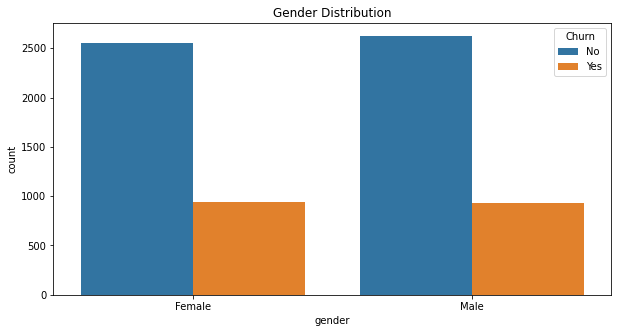

In [10]:
plt.figure(figsize= (10,5))
plt.title('Gender Distribution')
sns.countplot(x= 'gender', data = data, hue= 'Churn')
plt.show()

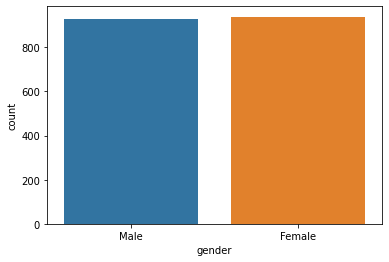

In [11]:
sns.countplot(x = 'gender',data= data.query('Churn == "Yes"'))
plt.show()

Out of the churned customers, genders is not a major differentiator

###### Analyzing Senior Citizen for churned accounts

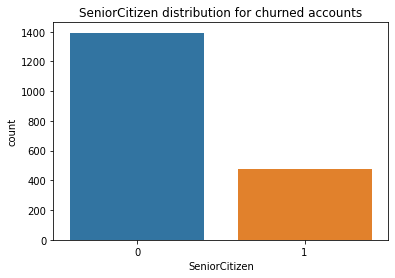

In [12]:
plt.title("SeniorCitizen distribution for churned accounts")
sns.countplot(x = 'SeniorCitizen',data= data.query('Churn == "Yes"'))
plt.show()

Since gender, SeniorCitizen and Churn are categorical we cannot really use correlation to analyze the relationship between them.

We can use a chi-square test to determine the relationship between them. The chi-square test is a statistical test that measures the association between two categorical variables. It compares the observed frequencies of the categories in the two variables to the expected frequencies if the variables were independent.

We can use the crosstab() function in pandas to create a contingency table of the counts of "yes" and "no" for each variable. Then, we can use the chi2_contingency() function from the scipy.stats library to perform the chi-square test.

The p-value returned by the chi-square test will give you a measure of the likelihood that the relationship between the two variables is due to chance. A small p-value (typically less than 0.05) indicates that the relationship is statistically significant and that the variables are not independent.

In [13]:
from scipy.stats import chi2_contingency

# Create the contingency table
contingency_table = pd.crosstab(data['gender'], data['Churn'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(p)

0.48657873605618596


We can see that the P-Value for Gender and Churn is high, which means it is highly unlikely that they are dependent on eachother. (As we analyzed from our countplot)

In [14]:
# Create the contingency table
contingency_table = pd.crosstab(data['SeniorCitizen'], data['Churn'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(p)

1.510066805092378e-36


This p-value is extremely small, which means that the probability of the relationship between the two binary variables being due to chance is extremely low. This suggests that there is a strong association between the two variables.

It indicates that the two columns are dependent on each other, meaning that the value of one column is related to the value of the other column.

##### Analyzing Partner

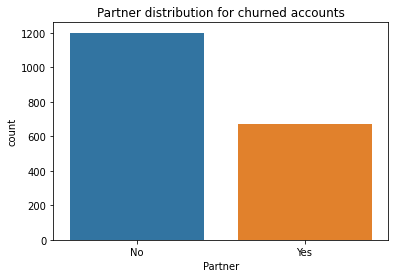

In [15]:
plt.title("Partner distribution for churned accounts")
sns.countplot(x = 'Partner',data= data.query('Churn == "Yes"'))
plt.show()

In [16]:
# Create the contingency table
contingency_table = pd.crosstab(data['Partner'], data['Churn'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(p)

2.1399113440759935e-36


###### Writing a function that does the chi-sq test on all the categorical columns and returns a list of columns with p-value significantly less

In [17]:
def p_vals(df1):
    
    cols = df1.select_dtypes(include='object')
    cols_dict = {}
    
    
    for column in cols:
        contingency_table = pd.crosstab(df1[column], df1['Churn'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        if p < 0.005:
            cols_dict[column] = p
    
    return list(cols_dict.keys()), cols_dict
            
        
    

In [18]:
p_vals(data)

(['Partner',
  'Dependents',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'Churn'],
 {'Partner': 2.1399113440759935e-36,
  'Dependents': 4.9249216612154196e-43,
  'MultipleLines': 0.0034643829548773,
  'InternetService': 9.571788222840544e-160,
  'OnlineSecurity': 2.661149635176552e-185,
  'OnlineBackup': 2.0797592160864276e-131,
  'DeviceProtection': 5.505219496457244e-122,
  'TechSupport': 1.4430840279998987e-180,
  'StreamingTV': 5.528994485739183e-82,
  'StreamingMovies': 2.667756755723681e-82,
  'Contract': 5.863038300673391e-258,
  'PaperlessBilling': 4.073354668665985e-58,
  'PaymentMethod': 3.6823546520097993e-140,
  'Churn': 0.0})

These categorical columns are significant for our analysis!

In [19]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Analyzing numerical columns

In [20]:
data.select_dtypes(include= ['int64','float64'])

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [21]:
data.groupby('Churn').describe()

SeniorCitizen                                               tenure  \
              count      mean       std  min  25%  50%  75%  max   count   
Churn                                                                      
No           5174.0  0.128721  0.334923  0.0  0.0  0.0  0.0  1.0  5174.0   
Yes          1869.0  0.254682  0.435799  0.0  0.0  0.0  1.0  1.0  1869.0   

                  ...             MonthlyCharges                               \
            mean  ...   75%   max          count       mean        std    min   
Churn             ...                                                           
No     37.569965  ...  61.0  72.0         5174.0  61.265124  31.092648  18.25   
Yes    17.979133  ...  29.0  72.0         1869.0  74.441332  24.666053  18.85   

                                    
         25%     50%   75%     max  
Churn                               
No     25.10  64.425  88.4  118.75  
Yes    56.15  79.650  94.2  118.35  

[2 rows x 24 columns]

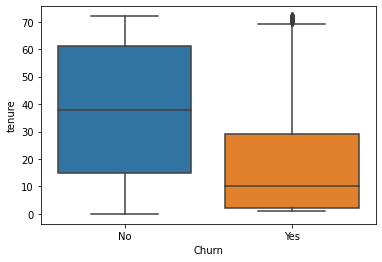

In [22]:
sns.boxplot( x = 'Churn', y='tenure', data = data)

There clearly is a pattern, if we observe that the customers with tenure more than 30 are less likely to Churned.

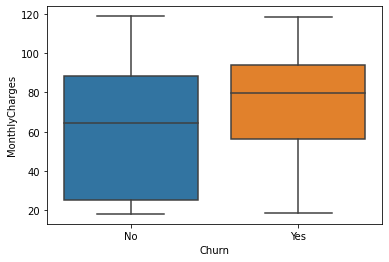

In [23]:
sns.boxplot( x = 'Churn', y='MonthlyCharges', data = data)

Similarly if we observe that the customers with monthlycharges less than 60 are less likely to be Churned.

In [24]:
data['TotalCharges']= pd.to_numeric(data['TotalCharges'], errors='coerce')

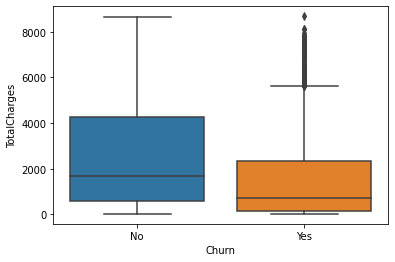

In [25]:
sns.boxplot(x='Churn', y= 'TotalCharges', data=data)

We can see that there are many outliers and also the chi2 test when this column was categorical gave a large p-value, so we can exclude this column from our analysis

In [26]:
data['SeniorCitizen']= data['SeniorCitizen'].astype(str)

Converted 'SeniorCitizen' which was int to categorical data type. 

##### Selecting our final columns in our dataframe

In [27]:
cols = p_vals(data)[0]

In [28]:
cols.append('tenure')

In [29]:
cols.append('MonthlyCharges')

In [30]:
cols

['SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'tenure',
 'MonthlyCharges']

In [31]:
data_selected = data[cols]

In [32]:
data_selected = data_selected.replace({'Yes': 1, 'No': 0})

In [33]:
data_selected.head()

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges
0,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,0,1,29.85
1,0,0,0,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,0,34,56.95
2,0,0,0,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,1,2,53.85
3,0,0,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),0,45,42.30
4,0,0,0,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,1,2,70.70


In [34]:
data_selected['MultipleLines'] = data_selected['MultipleLines'].replace({'No phone service':0}) ## because considering No Phone service is equivalent to no multiple lines

In [35]:
data_selected['OnlineSecurity'] = data_selected['OnlineSecurity'].replace({'No internet service':0}) ## because considering No internet service is equivalent to no online security

In [36]:
data_selected = data_selected.replace({'No internet service':0})

In [37]:
data_selected.head()

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges
0,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,0,1,29.85
1,0,0,0,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,0,34,56.95
2,0,0,0,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,1,2,53.85
3,0,0,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),0,45,42.30
4,0,0,0,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,1,2,70.70


In [38]:
data_selected['TechSupport'].value_counts()

0    4999
1    2044
Name: TechSupport, dtype: int64

In [39]:
data_selected.dtypes

SeniorCitizen        object
Partner               int64
Dependents            int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
Churn                 int64
tenure                int64
MonthlyCharges      float64
dtype: object

In our dataset, only tenure and monthlycharges are supposed to be numeric data, and the rest are categorical (binary categories and others).

Let us convert everything into object data type except tenure and monthlycharges


In [40]:
cols = data_selected.columns[:-2]

In [41]:
data_selected[cols]=data_selected[cols].astype(str)

In [42]:
data_selected.dtypes

SeniorCitizen        object
Partner              object
Dependents           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Churn                object
tenure                int64
MonthlyCharges      float64
dtype: object

In [44]:
!pip install category_encoders
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.compose import make_column_transformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 4.5 MB/s eta 0:00:00


In [45]:
y = data_selected['Churn']

In [46]:
x = data_selected.drop(['Churn'], axis=1)

Scaling the numeric attribs, and encoding non binary categorical attribs!

In [47]:
column_trans = make_column_transformer(
(OneHotEncoder(), ['InternetService','Contract','PaymentMethod']
), (StandardScaler(),['tenure','MonthlyCharges']),remainder = 'passthrough')

In [48]:
X_prep = column_trans.fit_transform(x)

In [49]:
X_prep

array([[1, 0, 0, ..., '0', '0', '1'],
       [1, 0, 0, ..., '0', '0', '0'],
       [1, 0, 0, ..., '0', '0', '1'],
       ...,
       [1, 0, 0, ..., '0', '0', '1'],
       [0, 1, 0, ..., '0', '0', '1'],
       [0, 1, 0, ..., '1', '1', '1']], dtype=object)

In [50]:
y.shape

(7043,)

In [51]:
y = y.map({'1': 1, '0': 0}).astype(int)

In [52]:
y.shape

(7043,)

## Modeling

Since this is a binary classification problem, we can work on logistic regression, RF, and gradient boosting models. Let's compare them with appropriate metrics and choose the best model

In [53]:
X_prep

array([[1, 0, 0, ..., '0', '0', '1'],
       [1, 0, 0, ..., '0', '0', '0'],
       [1, 0, 0, ..., '0', '0', '1'],
       ...,
       [1, 0, 0, ..., '0', '0', '1'],
       [0, 1, 0, ..., '0', '0', '1'],
       [0, 1, 0, ..., '1', '1', '1']], dtype=object)

### Pipeline and Selecting the best model

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# load data and split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.2, random_state=42)

# create pipeline for each model
pipe_rf = Pipeline([
    ('clf', RandomForestClassifier())
])

pipe_dt = Pipeline([
    ('clf', DecisionTreeClassifier())
])

pipe_logreg = Pipeline([
    ('clf', LogisticRegression())
])

# create list of pipelines
pipelines = [pipe_rf, pipe_dt, pipe_logreg]

# create dictionary of hyperparameters to search
param_grids = [
    {'clf__n_estimators': [10, 100, 500], 'clf__criterion': ['gini', 'entropy']},
    {'clf__max_depth': [5, 10, 20]},
    {'clf__penalty':['l1','l2'], 'clf__C' :[0.1, 1,10], 'clf__solver':['lbfgs', 'newton-cg']}
]

# train and select the best model
best_f1 = 0
for pipeline, param_grid in zip(pipelines, param_grids):
    gs = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
    gs.fit(X_train, y_train)
    preds = gs.predict(X_test)
    f1 = f1_score(y_test, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_model = gs

# get the best pipeline and hyperparameters
best_pipeline = best_model.best_estimator_
best_params = best_model.best_params_


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fil

In [55]:
best_pipeline

Pipeline(steps=[('clf', DecisionTreeClassifier(max_depth=5))])

In [56]:
best_params

{'clf__max_depth': 5}

### Modeling with Decision Trees

In [57]:
dtc = DecisionTreeClassifier(max_depth=5)

In [58]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [59]:
y_pred = dtc.predict(X_test)

In [60]:
f1 = f1_score(y_test, y_pred)

In [61]:
f1

0.6361256544502619

In [62]:
accuracy = accuracy_score(y_test, y_pred)

In [63]:
accuracy

0.8026969481902059

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score

In [65]:
# Calculate false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [66]:
# Calculate AUC
auc = roc_auc_score(y_test, y_pred)

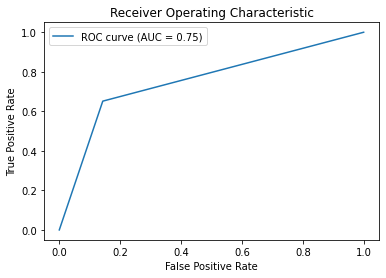

In [67]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

In [69]:
cm = confusion_matrix(y_test, y_pred)

In [70]:
cm

array([[888, 148],
       [130, 243]])

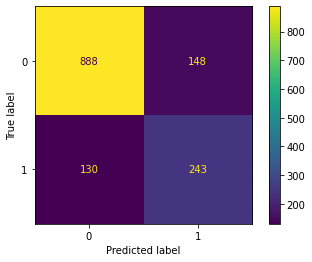

In [71]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [72]:
import xgboost as xgb


In [73]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1]
}

In [74]:
xgb_clf = xgb.XGBClassifier()

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(xgb_clf, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
Best score:  0.5744279100470144
